In [12]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [13]:
from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [14]:
#Importing the dataset
df=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

C:\Users\lrnem\AppData\Local\Temp\ipykernel_8728\2134542247.py:2: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")


In [15]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [16]:
#Understanding the data
df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


In [17]:
df.shape

(300698, 53)

In [18]:
#Conversion to datetime format
df["Created Date"]=pd.to_datetime(df["Created Date"])
df["Closed Date"]=pd.to_datetime(df["Closed Date"])

In [19]:
#Creating a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing
df["Request_Closing_Time"]=(df["Closed Date"]-df["Created Date"])
Request_Closing_Time=[]
for x in (df["Closed Date"]-df["Created Date"]):
    close=x.total_seconds()/60
    Request_Closing_Time.append(close)
df["Request_Closing_Time"]=Request_Closing_Time

In [20]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",55.250000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",86.266667
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",291.516667
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",465.233333
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",207.033333


In [21]:
#EDA
df["Agency"].unique()

array(['NYPD'], dtype=object)

We can see the above data belongs to the NYPD.

C:\Users\lrnem\AppData\Local\Temp\ipykernel_8728\5426915.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Request_Closing_Time"])


<function matplotlib.pyplot.show(close=None, block=None)>

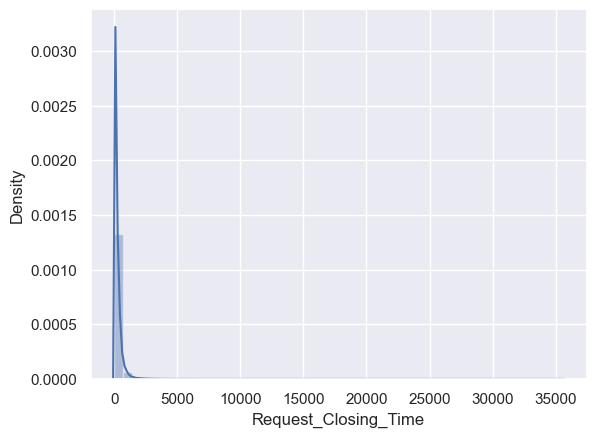

In [22]:
sns.distplot(df["Request_Closing_Time"])
plt.show

In [23]:
print("Total Number of Complaints : ",len(df),"\n")
print("Percentage of complaints that took 99 hours or less : ",round((len(df)-(df["Request_Closing_Time"]>=99).sum())/len(df)*100,2),"%")
print("Percentage of complaints that took 999 hours or less : ",round((len(df)-(df["Request_Closing_Time"]>=999).sum())/len(df)*100,2),"%")

Total Number of Complaints :  300698 

Percentage of complaints that took 99 hours or less :  32.88 %
Percentage of complaints that took 999 hours or less :  97.18 %


From the above data we can see that majority of the complaints needed more than 99 hours to be dealt with.

C:\Users\lrnem\AppData\Local\Temp\ipykernel_8728\2810770643.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Request_Closing_Time"])


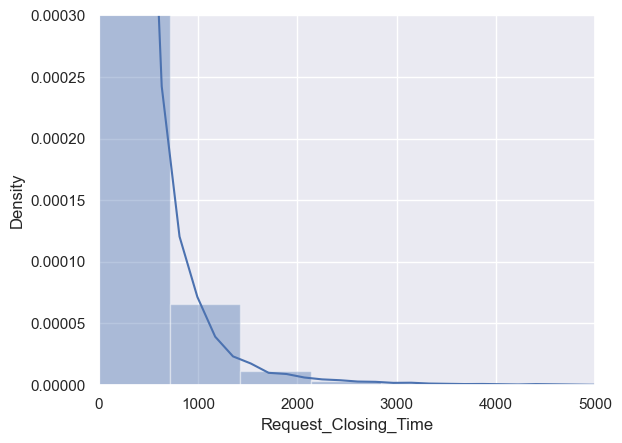

In [24]:
sns.distplot(df["Request_Closing_Time"])
plt.xlim((0,5000))
plt.ylim((0,0.0003))
plt.show()

Now let us try to understand the major complaint types

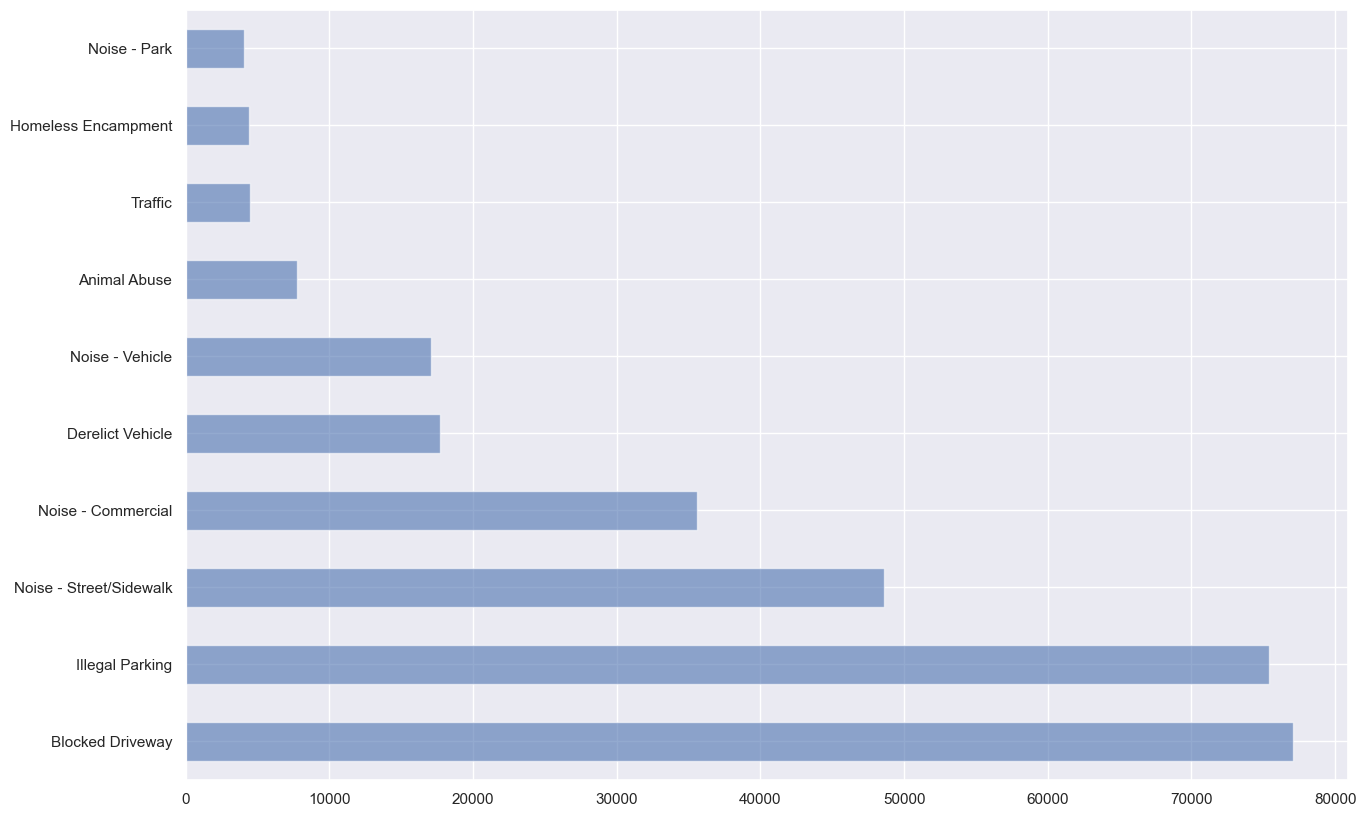

In [25]:
df['Complaint Type'].value_counts()[:10].plot(kind='barh',alpha=0.6,figsize=(15,10))
plt.show()

From the above graph we can see that majority of complaints are related to that of transporttion and parking and as such it needed more time to be resolved.

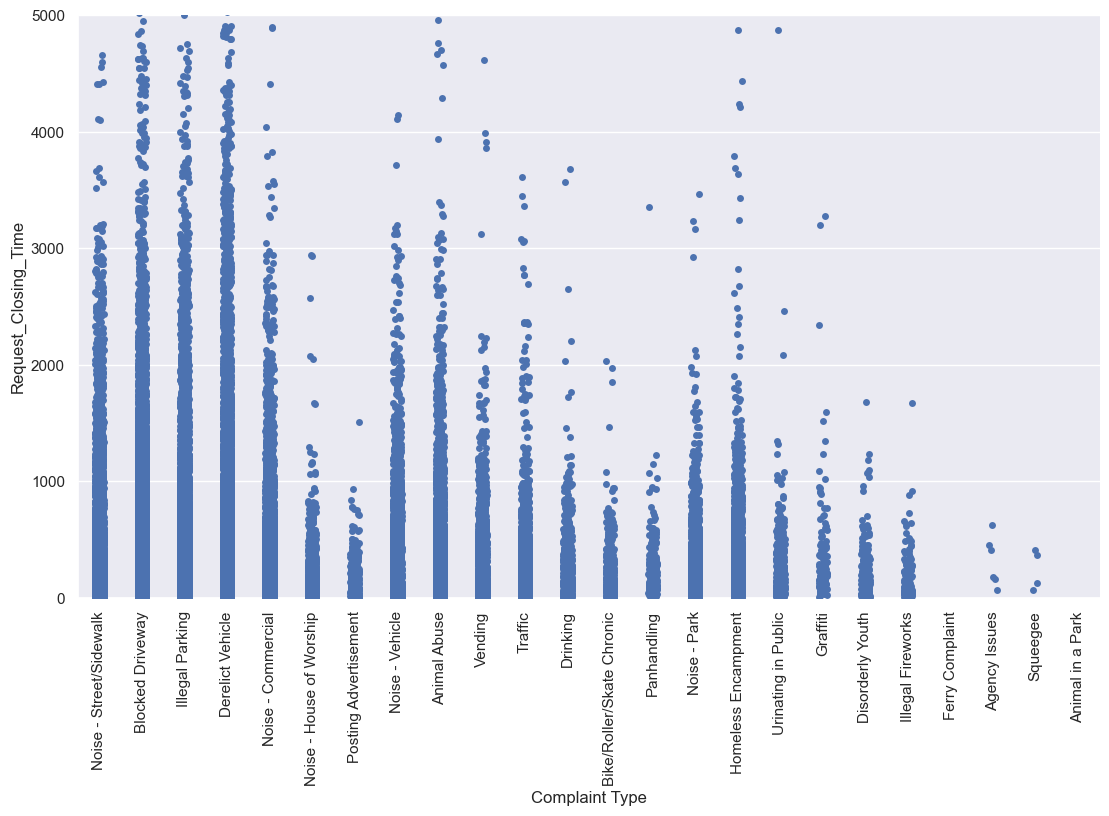

In [26]:
crt = sns.catplot(x='Complaint Type', y="Request_Closing_Time",data=df)
crt.fig.set_figwidth(15)
crt.fig.set_figheight(7)
plt.xticks(rotation=90)
plt.ylim((0,5000))
plt.show()

We can see from the above lot that major complaints arises from transport and take up huge time to be resolved and as such the government should take steps to improve the transport system and implement stricter vehicle laws.

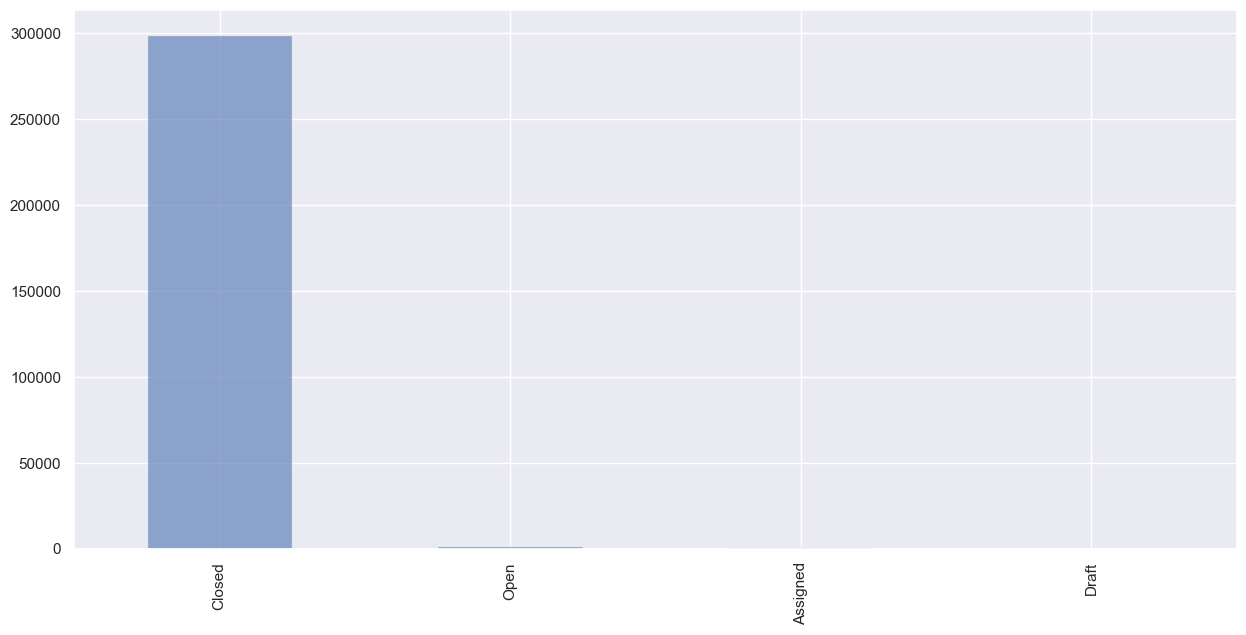

In [27]:
df['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(15,7))
plt.show()

From the above plot we can see all complaints are now closed that is they are resolved.

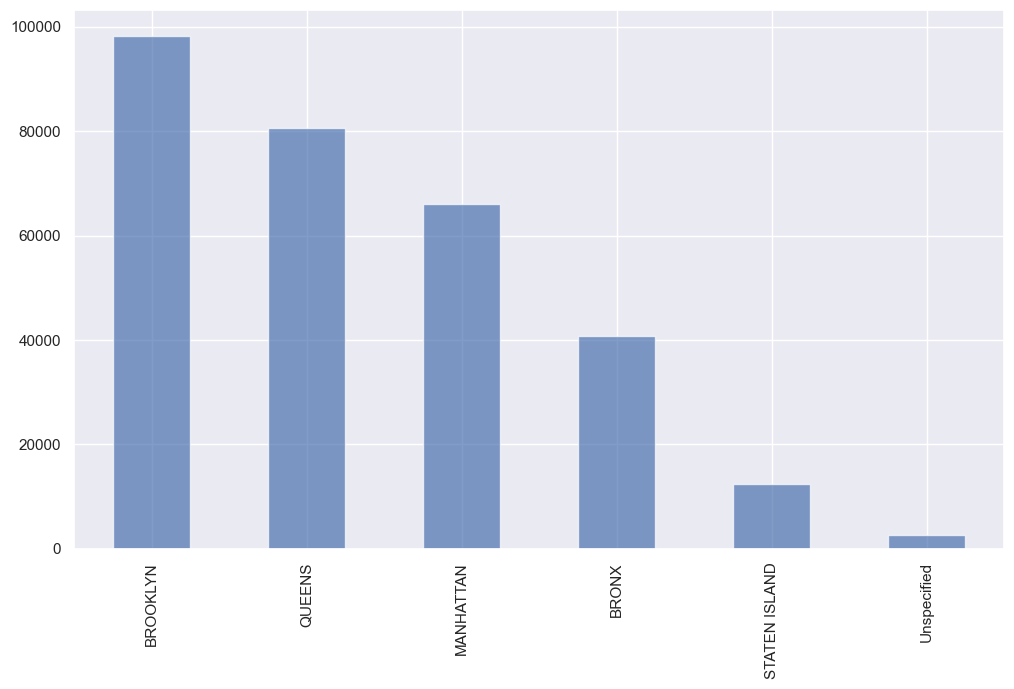

In [28]:
plt.figure(figsize=(12,7))
df['Borough'].value_counts().plot(kind='bar',alpha=0.7)
plt.show()

In [29]:
for x in df["Borough"].unique():
    print("Percentage of complaints from ",x," : ",round((df["Borough"]==x).sum()/len(df)*100,2))

Percentage of complaints from  MANHATTAN  :  21.99
Percentage of complaints from  QUEENS  :  26.82
Percentage of complaints from  BRONX  :  13.54
Percentage of complaints from  BROOKLYN  :  32.69
Percentage of complaints from  Unspecified  :  0.86
Percentage of complaints from  STATEN ISLAND  :  4.1


In [30]:
#All unique locations
df["Location Type"].unique()

array(['Street/Sidewalk', 'Club/Bar/Restaurant', 'Store/Commercial',
       'House of Worship', 'Residential Building/House',
       'Residential Building', 'Park/Playground', 'Vacant Lot',
       'House and Store', 'Highway', 'Commercial', 'Roadway Tunnel',
       'Subway Station', 'Parking Lot', 'Bridge', 'Terminal', nan,
       'Ferry', 'Park'], dtype=object)

In [31]:
pd.DataFrame(df.groupby("Location Type")["Request_Closing_Time"].mean()).sort_values("Request_Closing_Time")

,Request_Closing_Time
Location Type,
Subway Station,142.250980
Club/Bar/Restaurant,186.074330
House of Worship,191.833279
Store/Commercial,198.089073
Park/Playground,207.137129
Highway,223.424221
Bridge,229.158333
Roadway Tunnel,266.525714
Street/Sidewalk,268.515306


Conclusion : Maximum time taken to resolved a complaint is in park and vacant lots whereas complaints from subway or club/bar/restaurant take the lowest.

In [32]:
#losing time of complaints with respect to city
pd.DataFrame(df.groupby("City")["Request_Closing_Time"].mean()).sort_values("Request_Closing_Time")

,Request_Closing_Time
City,
ARVERNE,135.895606
ROCKAWAY PARK,139.133736
LITTLE NECK,154.660316
OAKLAND GARDENS,157.853146
BAYSIDE,160.759992
FAR ROCKAWAY,167.399774
NEW YORK,178.357371
FLUSHING,181.081826
FOREST HILLS,193.449032


In [33]:
#Percentage of missing values
pd.DataFrame((df.isnull().sum()/df.shape[0]*100)).sort_values(0,ascending=False)[:20]

,0
School or Citywide Complaint,100.000000
Garage Lot Name,100.000000
Vehicle Type,100.000000
Taxi Pick Up Location,100.000000
Taxi Company Borough,100.000000
Ferry Direction,99.999667
Ferry Terminal Name,99.999335
Road Ramp,99.929165
Bridge Highway Segment,99.929165
Bridge Highway Direction,99.919188


We can see that school or city wide complaint, garage lot name, vehicle type, taxi pickup location, taxi company borough have 100% missing values, that could mean there are no complaints from those sectors.

In [34]:
#We will now drop the missing values
dfn=df.loc[:,(df.isnull().sum()/df.shape[0]*100)<=50]

In [35]:
print("Old df shape :",df.shape)
print("New df shape: ",dfn.shape)

Old df shape : (300698, 54)
New df shape:  (300698, 40)


In [38]:
rem=[]
for x in dfn.columns.tolist():
    if dfn[x].nunique()<=3:
        print(x+ " "*10+" : ",dfn[x].unique())
        rem.append(x)

Agency           :  ['NYPD']
Agency Name           :  ['New York City Police Department' 'NYPD' 'Internal Affairs Bureau']
Facility Type           :  ['Precinct' nan]
Park Facility Name           :  ['Unspecified' 'Alley Pond Park - Nature Center']
School Name           :  ['Unspecified' 'Alley Pond Park - Nature Center']
School Number           :  ['Unspecified' 'Q001']
School Region           :  ['Unspecified' nan]
School Code           :  ['Unspecified' nan]
School Phone Number           :  ['Unspecified' '7182176034']
School Address           :  ['Unspecified' 'Grand Central Parkway, near the soccer field']
School City           :  ['Unspecified' 'QUEENS']
School State           :  ['Unspecified' 'NY']
School Zip           :  ['Unspecified' nan]
School Not Found           :  ['N']


We can remove the unspecified data

In [39]:
dfn.drop(rem,axis=1,inplace=True)

C:\Users\lrnem\AppData\Local\Temp\ipykernel_8728\3503437274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn.drop(rem,axis=1,inplace=True)


In [40]:
dfn.shape

(300698, 26)

In [41]:
dfn.head()

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",55.250000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",86.266667
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",291.516667
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",465.233333
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",207.033333


(0.0, 2000.0)

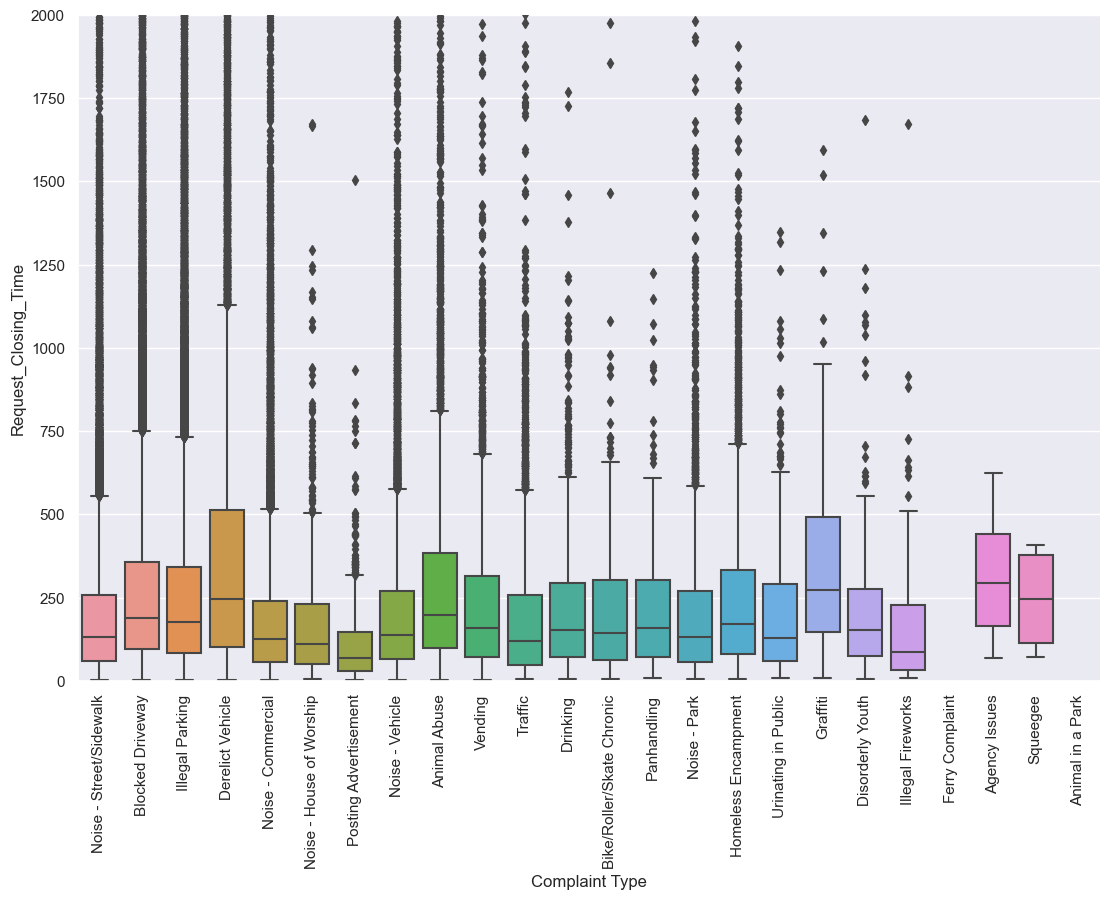

In [43]:
#Hypothesis testing
crt=sns.catplot(x="Complaint Type",y="Request_Closing_Time",kind="box",data=dfn)
crt.fig.set_figheight(8)
crt.fig.set_figwidth(15)
plt.xticks(rotation=90)
plt.ylim((0,2000))

H0: There is no significant different in mean of Request_Closing_Time for different Complaint


H1: There is signficant different in mean of Request_Closing_Time for different Complaint

In [46]:
anova_df=pd.DataFrame()
anova_df["Request_Closing_Time"]=dfn["Request_Closing_Time"]
anova_df["Complaint"]=dfn["Complaint Type"]

anova_df.dropna(inplace=True)
anova_df.head()

,Request_Closing_Time,Complaint
0,55.250000,Noise - Street/Sidewalk
1,86.266667,Blocked Driveway
2,291.516667,Blocked Driveway
3,465.233333,Illegal Parking
4,207.033333,Illegal Parking


In [47]:
lm=ols("Request_Closing_Time~Complaint",data=anova_df).fit()
table=sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
Complaint,22.0,1.455049e+09,6.613860e+07,514.177089,0.0
Residual,298511.0,3.839747e+10,1.286300e+05,NaN,NaN


In [48]:
chi_sq=pd.DataFrame()
chi_sq["Location Type"]=dfn["Location Type"]
chi_sq["Complaint Type"]=dfn["Complaint Type"]
chi_sq.dropna(inplace=True)

In [49]:
data_crosstab = pd.crosstab( chi_sq["Location Type"],chi_sq["Complaint Type"])

In [50]:
stat, p, dof, expected = chi2_contingency(data_crosstab) 

alpha = 0.05
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)')

Dependent (reject H0)


Conclusions :
    1. Different complaints last for different duration.
    2. Complaints are different in different locations.
    3. Majority complaints are from transport sector.
    4. School sector has the lowest number of complaints(next to none).